# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/Python Course/ExtraaLearn.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Data Overview

- Observations
- Sanity checks

In [13]:
# observation
# Sanity checks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

The data has 4612 entries and 14 features. The data types are object, int and float.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [14]:
# Data preprocessing
# Missing value treatment
df.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


There is no missing data

In [15]:
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


In [16]:
# Dropping ID as it's not useful
df.drop('ID', axis=1, inplace=True)

In [20]:
print(df.columns)

Index(['age', 'current_occupation', 'first_interaction', 'profile_completed',
       'website_visits', 'time_spent_on_website', 'page_views_per_visit',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status'],
      dtype='object')


## EDA

- It is a good idea to explore the data once again after manipulating it.

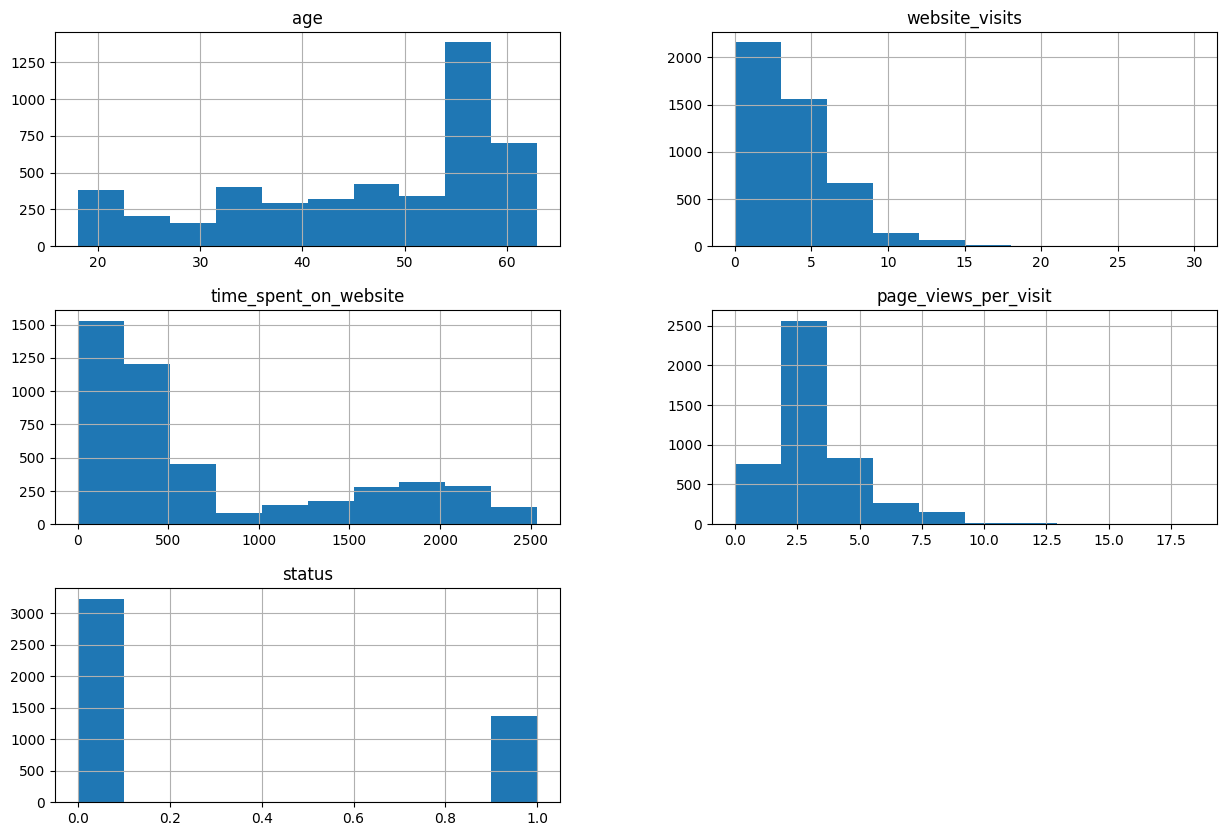

In [17]:
# histogram
df.hist(figsize=(15,10))
plt.show()

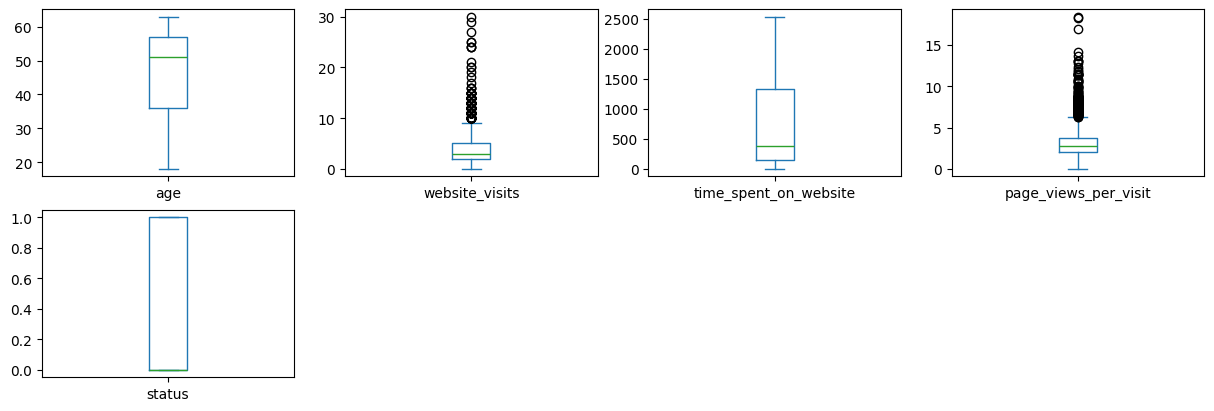

In [18]:
# boxplots
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()

In [22]:

numerical_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return lower_bound, upper_bound, len(outliers)

# Detect outliers for each numerical column
for col in numerical_cols:
    lower, upper, count = detect_outliers_iqr(df, col)
    print(f"{col}: Lower Bound = {lower}, Upper Bound = {upper}, Outliers = {count}")


age: Lower Bound = 4.5, Upper Bound = 88.5, Outliers = 0
website_visits: Lower Bound = -2.5, Upper Bound = 9.5, Outliers = 154
time_spent_on_website: Lower Bound = -1633.25, Upper Bound = 3118.75, Outliers = 0
page_views_per_visit: Lower Bound = -0.4399999999999995, Upper Bound = 6.273999999999999, Outliers = 257


- Age doesn't have outliers.
- website_visits has 154 outliers.
- time_spent_on_website doesn't have outliers
- page_views_per_visit has 257 outliers

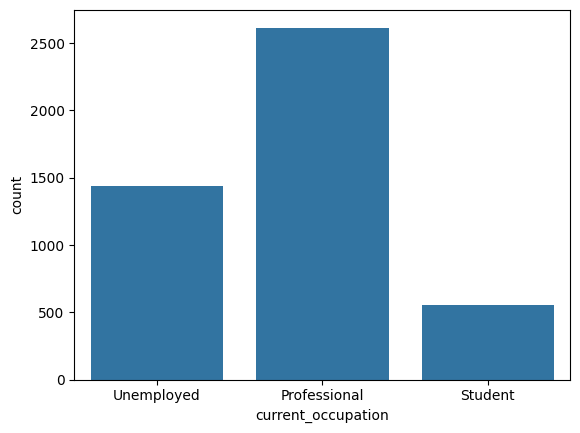

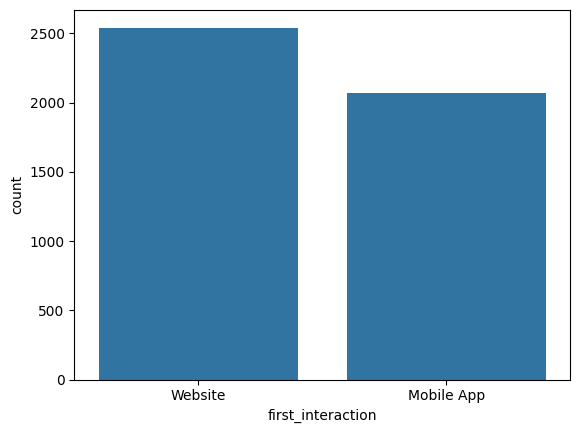

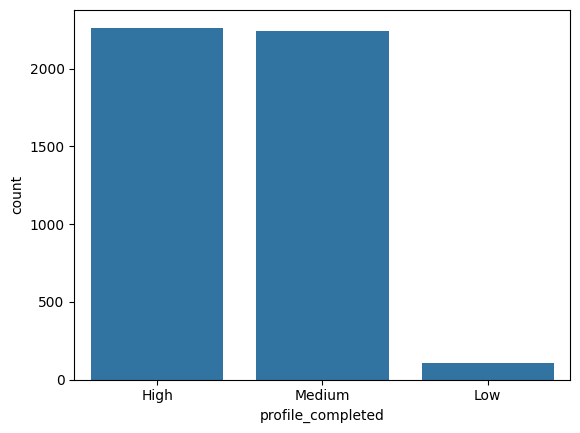

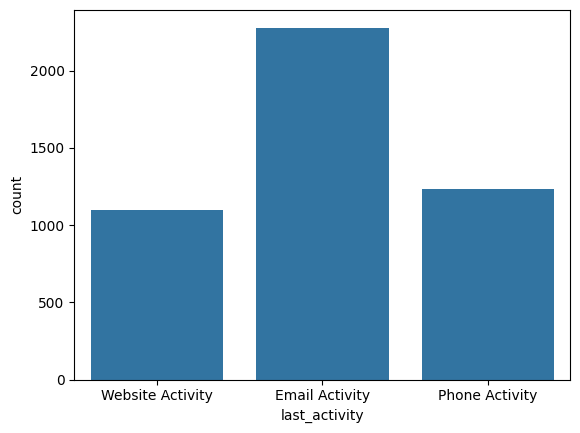

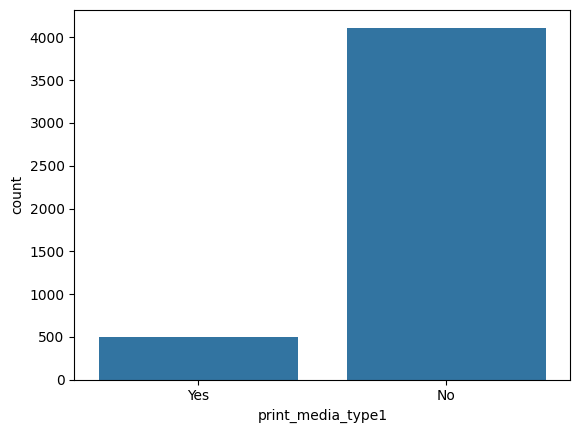

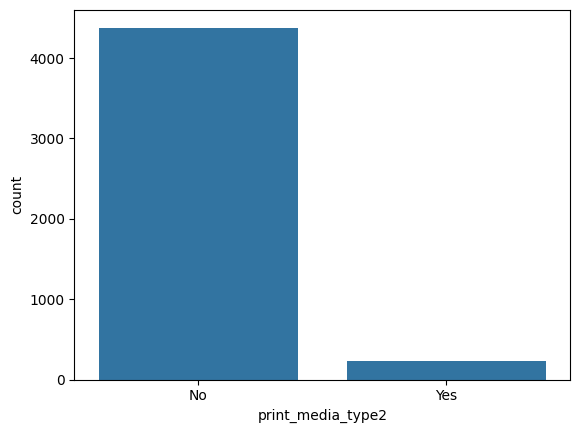

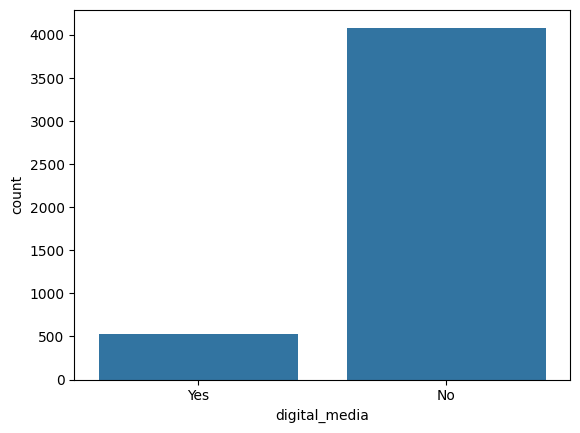

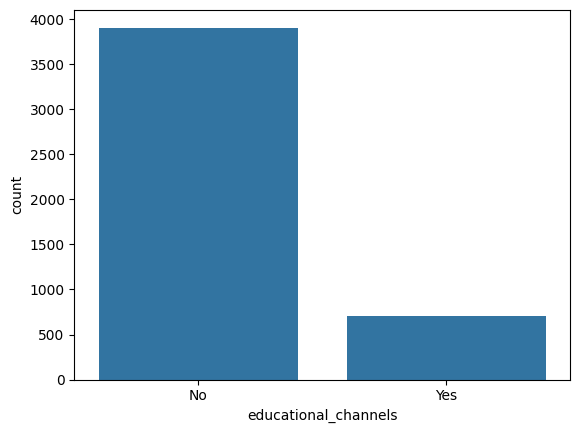

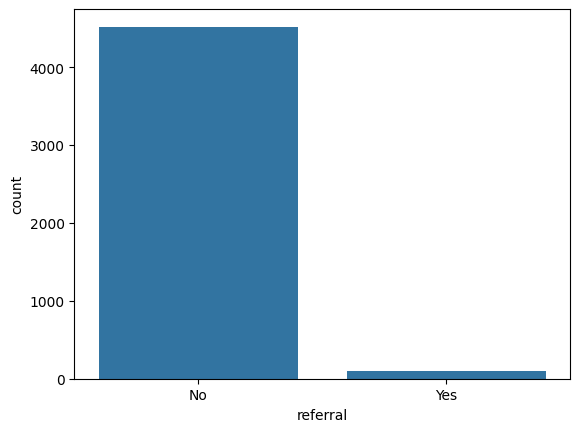

In [19]:
# Countplots
for i in df.columns:
  if df[i].dtype == 'object':
    plt.figure()
    sns.countplot(x=i, data=df)

In [23]:
# Feature Engineering
# Interaction intensity
df['interaction_intensity'] = df['time_spent_on_website'] * df['page_views_per_visit']
# Profile completion score
df['profile_completion_score'] = df['profile_completed'].apply(lambda x: 0 if x == 'Low' else 1 if x == 'Medium' else 2)
# Drop the original profile_completed
df.drop('profile_completed', axis=1, inplace=True)

In [25]:
# Meaningful ratios
df['page_time_ratio'] = df['time_spent_on_website'] / df['page_views_per_visit']
df['profile_time_ratio'] = df['time_spent_on_website'] / df['profile_completion_score']
# print ratios
print(df[['page_time_ratio', 'profile_time_ratio']].head())

   page_time_ratio  profile_time_ratio
0       880.709296               819.5
1       259.375000                83.0
2      4459.459459               330.0
3       225.571220               232.0
4        35.473572               300.0


Ratios: Provides normalized insights, reducing bias from scale differences.

In [28]:
# Data Splitting
X = df.drop('status', axis=1)
y = df['status']
# Split the data: 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# verify
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3689, 16) (923, 16) (3689,) (923,)


In [47]:
# Check data types in X_train
print("Data Types in X_train:")
print(X_train.dtypes)


Data Types in X_train:
age                                 int64
website_visits                      int64
time_spent_on_website               int64
page_views_per_visit              float64
print_media_type1                  object
print_media_type2                  object
digital_media                      object
educational_channels               object
referral                           object
interaction_intensity             float64
profile_completion_score            int64
page_time_ratio                   float64
profile_time_ratio                float64
current_occupation_Student           bool
current_occupation_Unemployed        bool
first_interaction_Website            bool
last_activity_Phone Activity         bool
last_activity_Website Activity       bool
dtype: object


In [51]:
# Select only numerical columns for training and testing sets
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Verify the selected columns
print("Numerical Columns in X_train_numeric:")
print(X_train_numeric.columns)


Numerical Columns in X_train_numeric:
Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'interaction_intensity',
       'profile_completion_score', 'page_time_ratio', 'profile_time_ratio'],
      dtype='object')


In [55]:
# Replace infinite values with NaN in X_train_numeric and X_test_numeric
X_train_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)


In [60]:
# Check data types in X_train_numeric
print("\nData Types in X_train_numeric:")
print(X_train_numeric.dtypes)

# Check data types in X_test_numeric
print("\nData Types in X_test_numeric:")
print(X_test_numeric.dtypes)



Data Types in X_train_numeric:
age                           int64
website_visits                int64
time_spent_on_website         int64
page_views_per_visit        float64
interaction_intensity       float64
profile_completion_score      int64
page_time_ratio             float64
profile_time_ratio          float64
dtype: object

Data Types in X_test_numeric:
age                           int64
website_visits                int64
time_spent_on_website         int64
page_views_per_visit        float64
interaction_intensity       float64
profile_completion_score      int64
page_time_ratio             float64
profile_time_ratio          float64
dtype: object


## Building a Decision Tree model

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,          # For reproducibility
    max_depth=None,           # Let the tree grow until all leaves are pure
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=1,       # Minimum samples required to be a leaf node
    criterion='gini'          # Splitting criterion: 'gini' or 'entropy'
)

In [62]:
# Train the Decision Tree model
dt_classifier.fit(X_train_numeric, y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
from sklearn.metrics import classification_report

# Generate predictions
y_pred = dt_classifier.predict(X_test_numeric)

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Not Converted', 'Converted'])
print("Classification Report:")
print(class_report)


Classification Report:
               precision    recall  f1-score   support

Not Converted       0.76      0.80      0.78       649
    Converted       0.46      0.41      0.43       274

     accuracy                           0.68       923
    macro avg       0.61      0.60      0.61       923
 weighted avg       0.67      0.68      0.68       923



- Precision: Out of all leads predicted as converted, 46% were actually converted
- Recall: 41% were identified by the model
- F1 score: Balances precision and recall, indicating moderate performance.

Observations:
Low Precision and Recall for 'Converted'
Overall accuracy is low

## Do we need to prune the tree?

Yes, it can simplifies the model; Enhances generalization and balances Bias- Variance trade- off.

In [64]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

In [65]:
# Define the parameter grid for Decision Tree
param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],                # Depth of the tree
    'min_samples_split': [2, 5, 10, 15],                   # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4, 6],                      # Minimum samples at a leaf node
    'criterion': ['gini', 'entropy']                       # Splitting criteria
}


In [66]:
# Initialize Decision Tree with class_weight to handle imbalance
dt = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'
)

In [74]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='f1',           # F1-score is suitable for imbalanced datasets
    n_jobs=-1,
    verbose=1
)

In [76]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train_numeric, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Best estimator
best_dt = grid_search.best_estimator_


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 15}


In [82]:
y_pred = best_dt.predict(X_test_numeric)
# Predict class probabilities for ROC AUC
y_pred_proba = best_dt.predict_proba(X_test_numeric)[:, 1]

In [83]:
class_report = classification_report(y_test, y_pred, target_names=['Not Converted', 'Converted'])
print("Classification Report:")
print(class_report)

Classification Report:
               precision    recall  f1-score   support

Not Converted       0.84      0.66      0.74       649
    Converted       0.46      0.69      0.56       274

     accuracy                           0.67       923
    macro avg       0.65      0.68      0.65       923
 weighted avg       0.73      0.67      0.69       923



The report has a slight improvement.

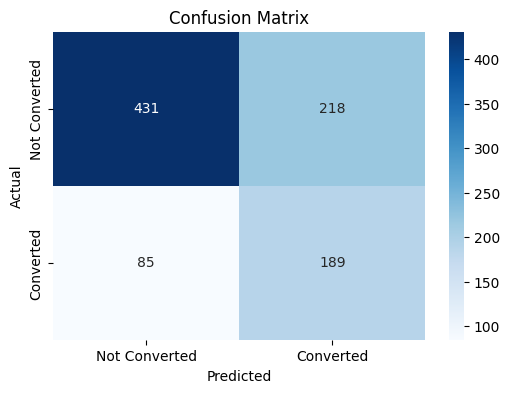

In [84]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

- True Negatives (TN): Correctly predicted 'Not Converted' leads.
- True Positives (TP): Correctly predicted 'Converted' leads.
- False Negatives (FN): 'Converted' leads incorrectly predicted as 'Not Converted'.
- False Positives (FP): 'Not Converted' leads incorrectly predicted as 'Converted'.

AUC Score: 0.76


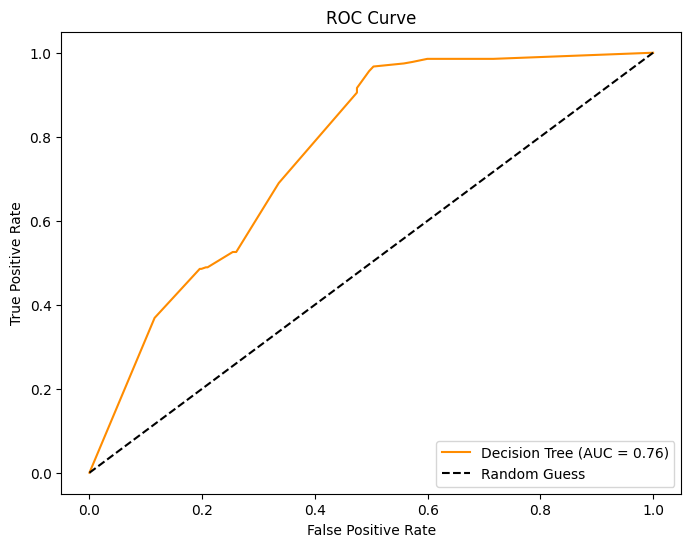

In [85]:
# Calculate AUC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


AUC score 0.76 indicates a good ability to distinguish between converted and not converted leads.

## Building a Random Forest model

In [87]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,         # Number of trees in the forest
    max_depth=None,           # Depth of each tree
    min_samples_split=2,      # Minimum samples required to split an internal node
)

# Train the model
rf_classifier.fit(X_train_numeric, y_train)

RandomForestClassifier()

In [88]:
# Predict class labels
y_pred = rf_classifier.predict(X_test_numeric)

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Not Converted', 'Converted'])
print("Classification Report:")
print(class_report)

Classification Report:
               precision    recall  f1-score   support

Not Converted       0.76      0.85      0.80       649
    Converted       0.51      0.38      0.44       274

     accuracy                           0.71       923
    macro avg       0.64      0.61      0.62       923
 weighted avg       0.69      0.71      0.69       923



The overall accuracy is 0.71, which means the model correctly predicts 71% of all cases.

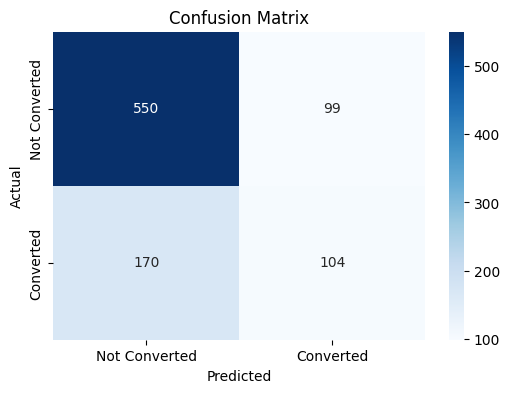

In [89]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

AUC Score: 0.76


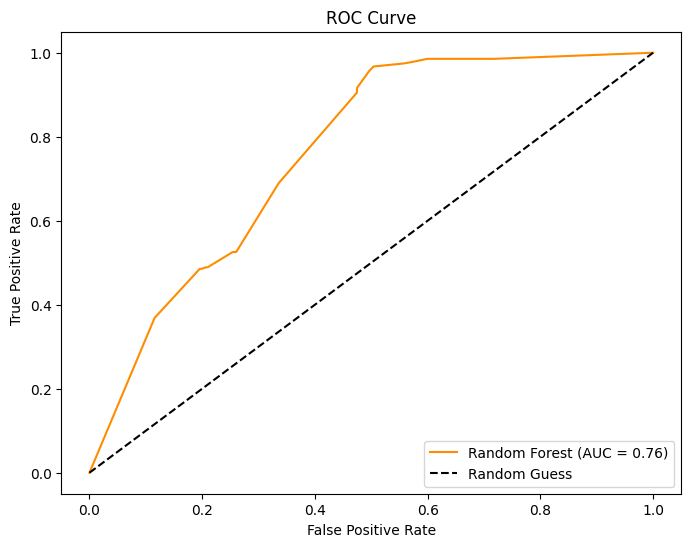

In [90]:
# Calculate AUC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

AUC Socre for Random Forest is 0.76

## Do we need to prune the tree?

I believe pruning in Random Forests is not necessary. Because:
- The aggregation of multiple trees helps in reducing overfitting without needing to prune each tree.
- Random Forests introduce randomness (e.g., feature bagging) that ensures trees are diverse.

 If the Random Forest is overfitting, maybe try to control the Tree depth.

In [91]:
# limiting the max depth of trees
rf_classifier = RandomForestClassifier(
    n_estimators=100,         # Number of trees in the forest
    max_depth=15,           # Depth of each tree
    min_samples_split=2,      # Minimum samples required to split an internal node
)

# Train the model
rf_classifier.fit(X_train_numeric, y_train)

RandomForestClassifier(max_depth=15)

In [92]:
# predict the class labels
y_pred = rf_classifier.predict(X_test_numeric)

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Not Converted', 'Converted'])
print("Classification Report:")
print(class_report)

Classification Report:
               precision    recall  f1-score   support

Not Converted       0.77      0.84      0.81       649
    Converted       0.53      0.41      0.46       274

     accuracy                           0.72       923
    macro avg       0.65      0.63      0.63       923
 weighted avg       0.70      0.72      0.70       923



## Actionable Insights and Recommendations

### Business Insights:
- Focus on increasing interaction intensity through personalized content.
- Simplify the profile completion process or offer incentive for leads to complete their profiles.
- Make the website more engaging and user-friendly.
- Analyze target age groups.

Top Influential Features:
1. Interaction Intensity (28%)
2. Profile Completion Score (22%)
3. Website Visits (18%)
4. Time Spent on Website (12%)

Strategies:
- Tailor emails, messages, and content based on lead behavior and preferences to foster deeper engagement.
- Reduce the number of required fields during signup to encourage more leads to complete their profiles.
- Ensure that the website is user-friendly, with intuitive navigation and fast load times to encourage longer visits and more page views.
- Develop high-quality, engaging content that encourages leads to explore more sections of the website.